# Komal Kale : DS24MS19

### Problem Statement 📝🔍:
    Develop a regression model to predict the compressive strength of concrete based on its material composition and age, aiming to optimize mix design for maximum durability and quality.
  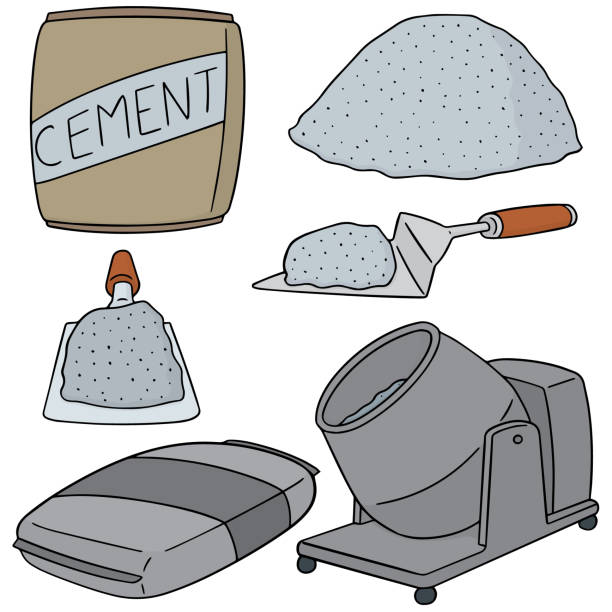

###  Import Libraries 📚

In [1]:
# !pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor

### Load Dataset 📊

In [3]:
df = pd.read_csv("concrete_Data.csv")

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.shape

(1030, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [8]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Check for Missing Values and Duplicates 🧐
○ Handle missing values
○ Convert data types
○ Remove duplicates

In [9]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


### Exploratory Data Analysis (EDA) 📊
 - Univariate analysis

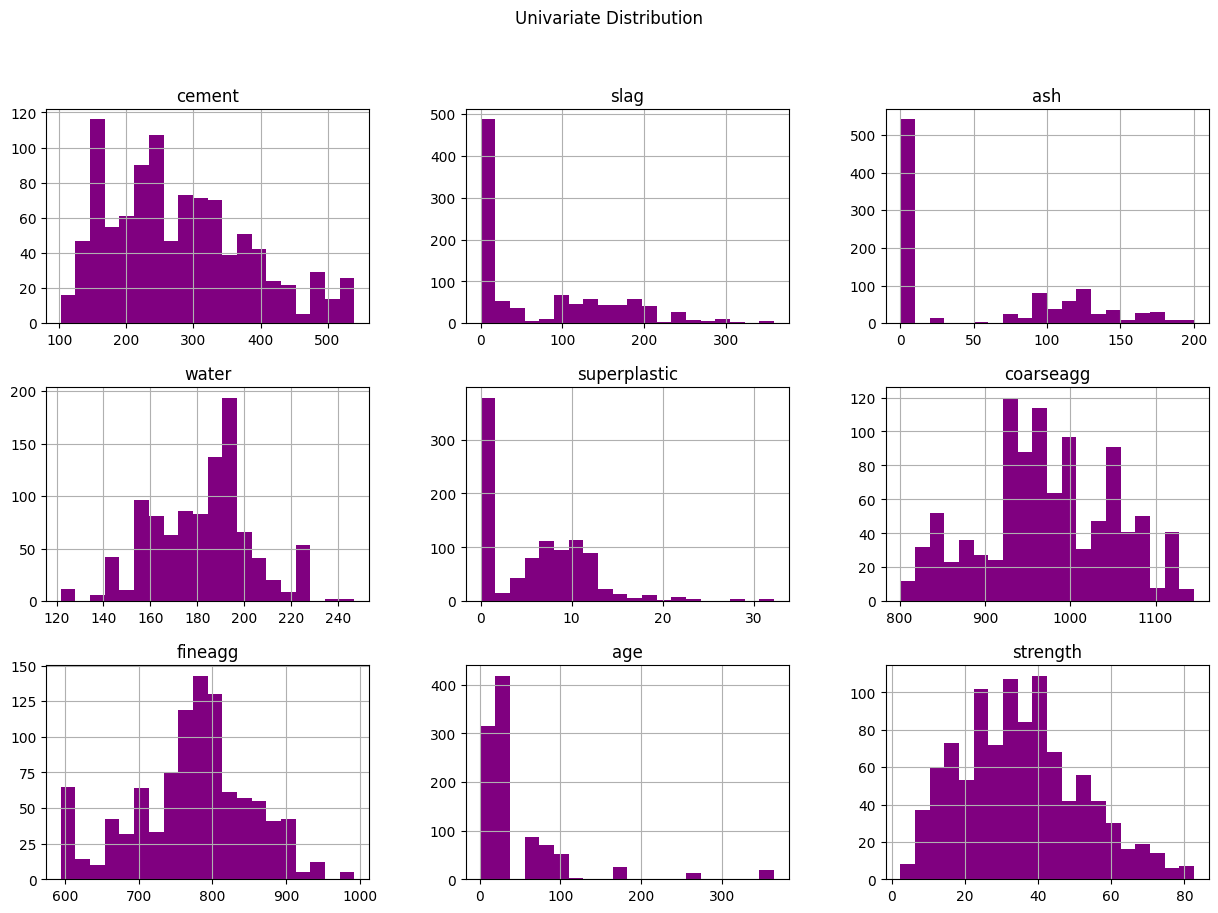

In [10]:
df.hist(bins = 20 ,figsize=(15, 10),color='#800080')
plt.suptitle("Univariate Distribution")
plt.show()

### - Bivariate analysis


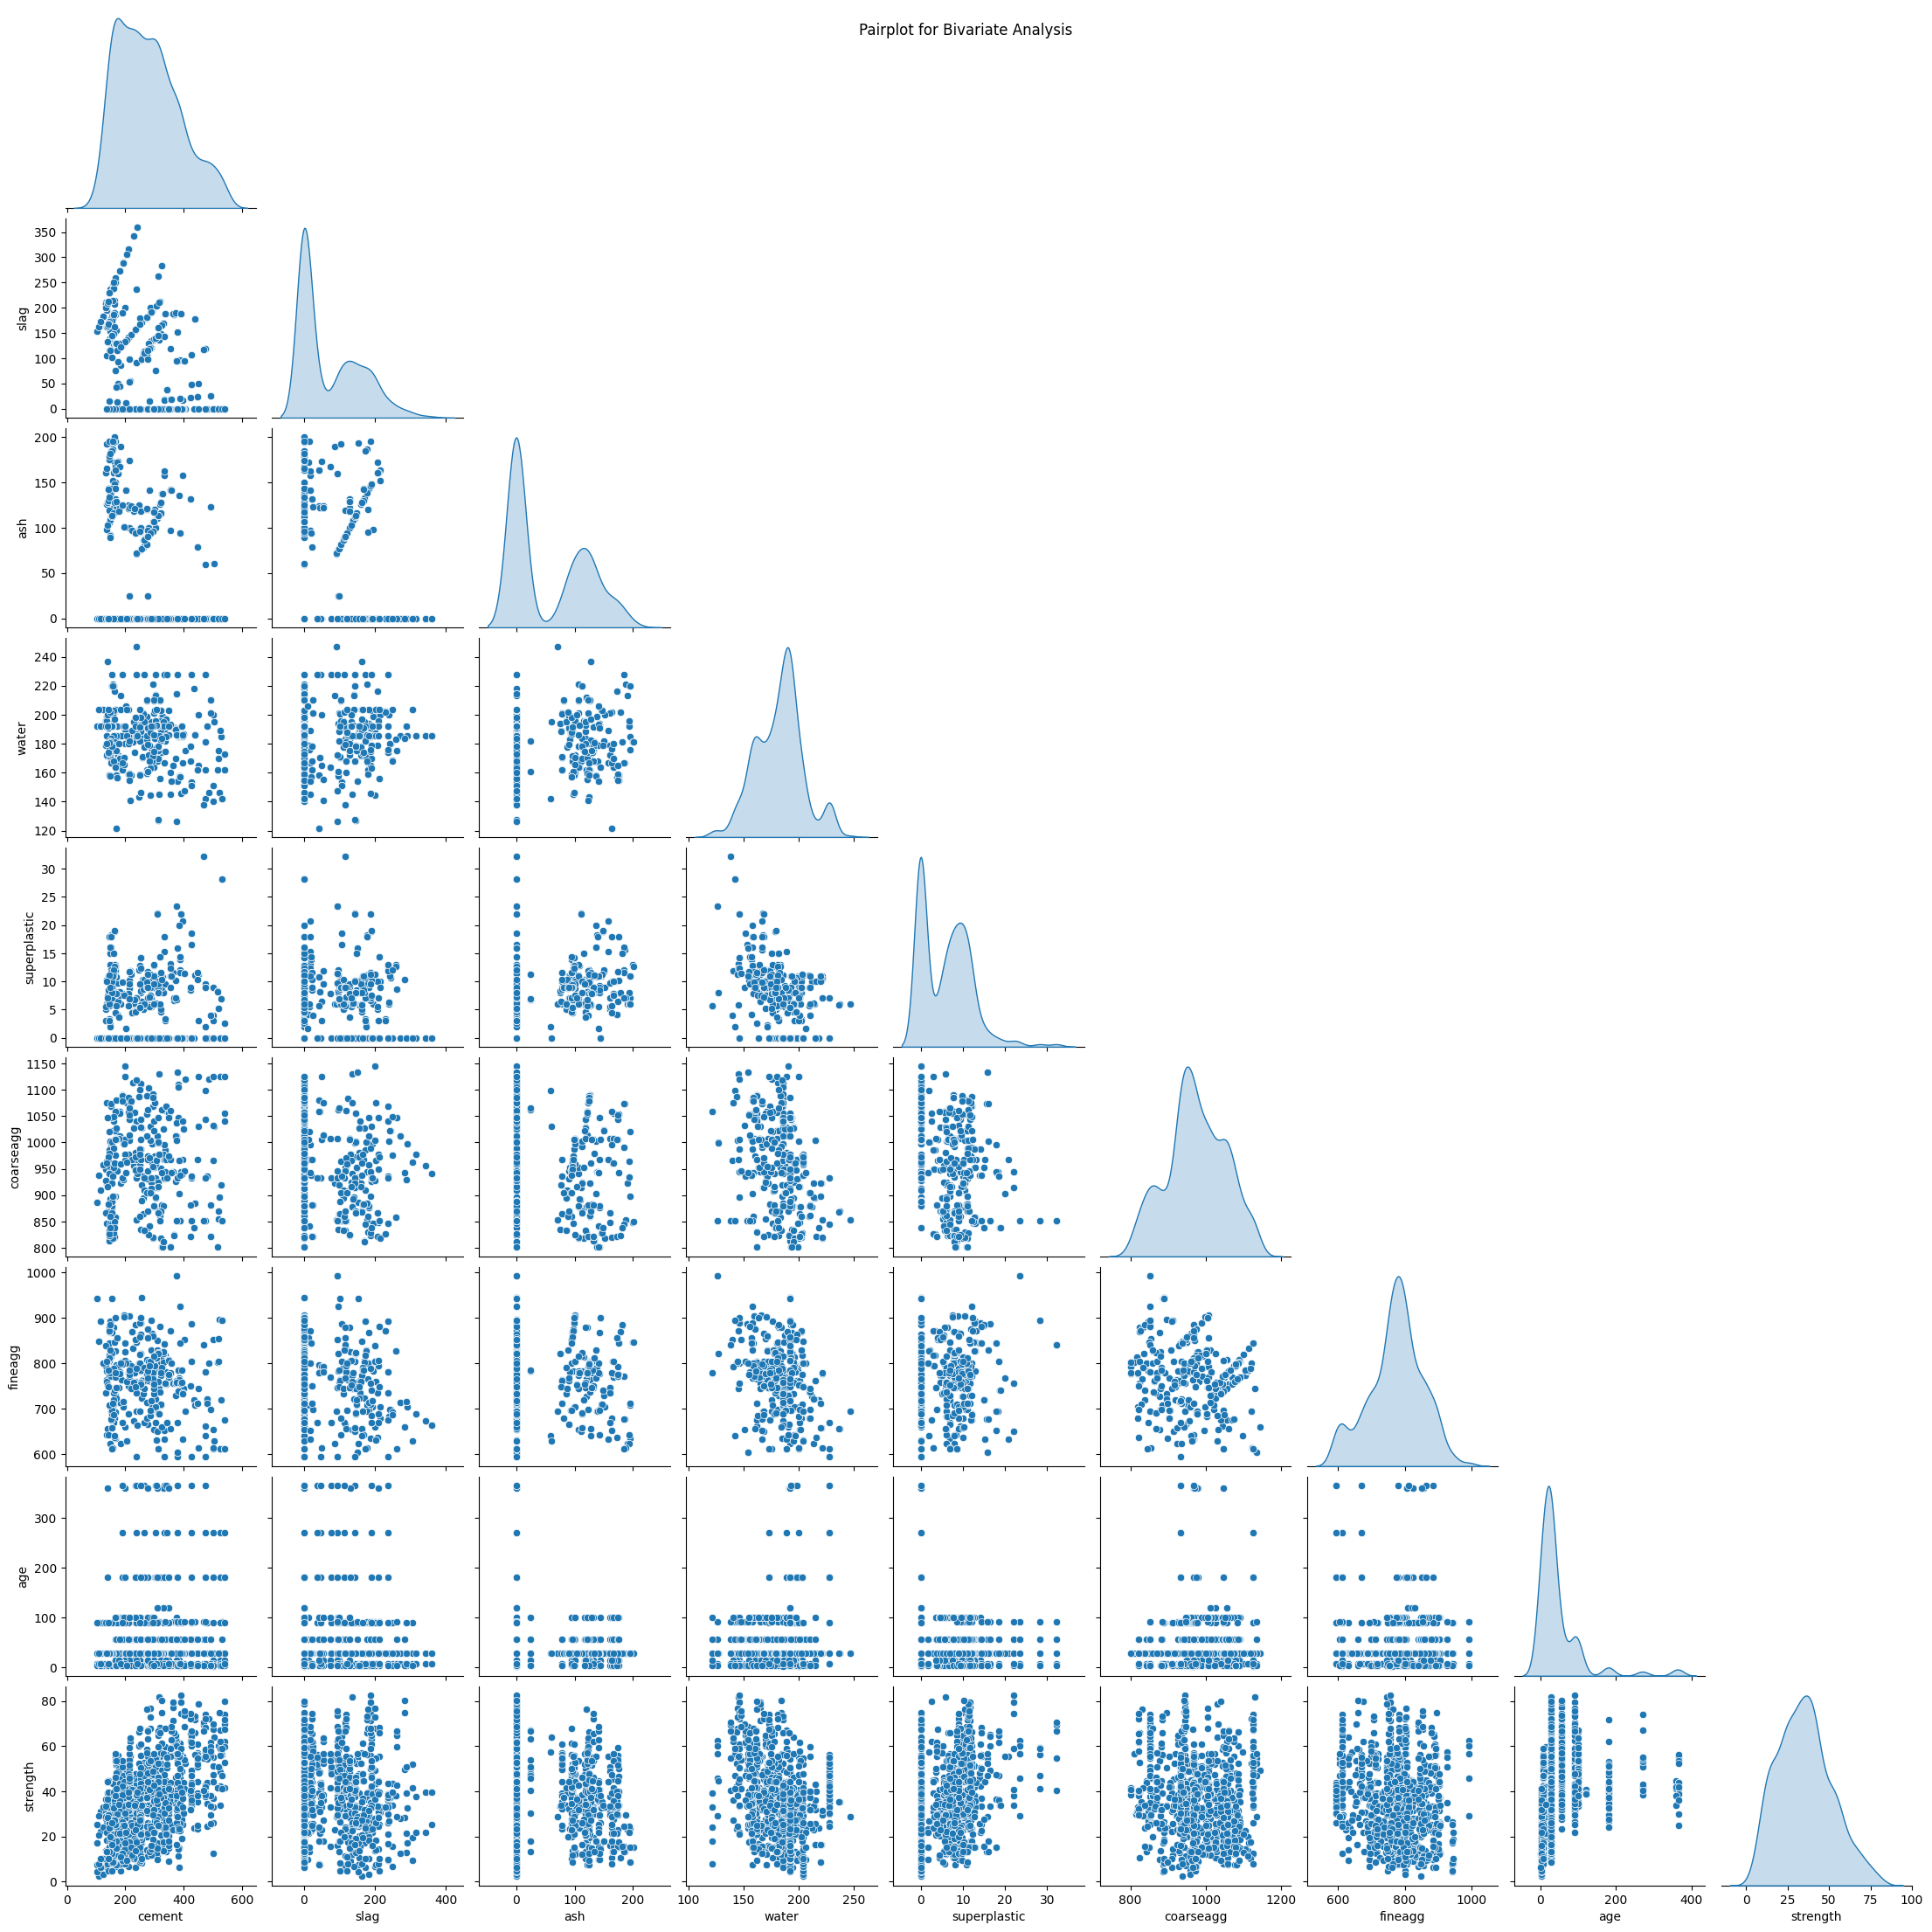

In [11]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot for Bivariate Analysis")
plt.show()

### ✅ diag_kind='kde' = smooth density on diagonals,
### ✅ corner=True = only show lower half of plots (no repeated scatterplots).



### ○ Correlation analysis 🔍

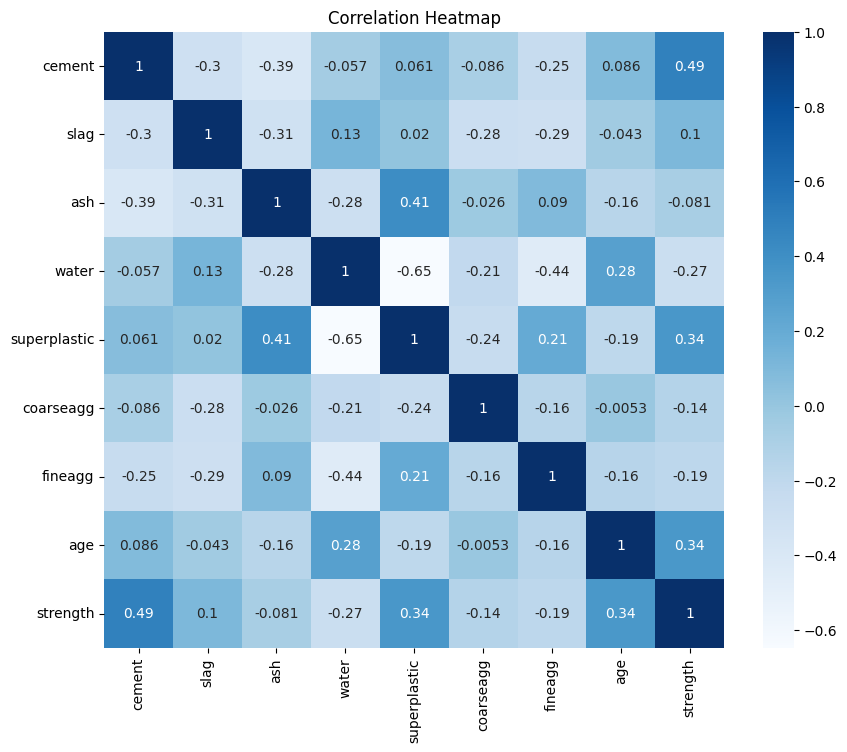

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

### Scatter Plot 📉
- Strength vs water

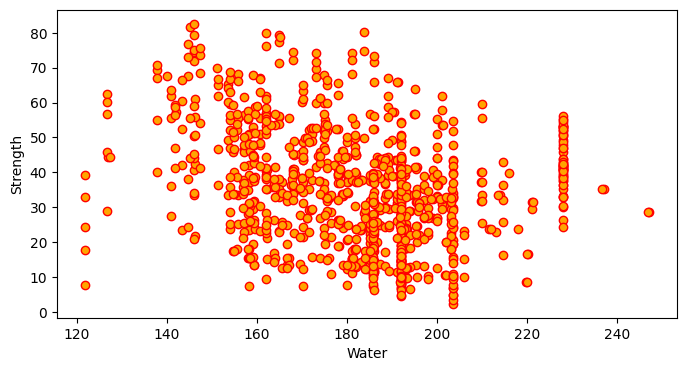

In [13]:
plt.figure(figsize=[8,4])
plt.scatter(y='strength', x='water', color ='orange',edgecolors='red', data=df)
plt.ylabel('Strength')
plt.xlabel('Water')
plt.show()

- Strength vs Cement

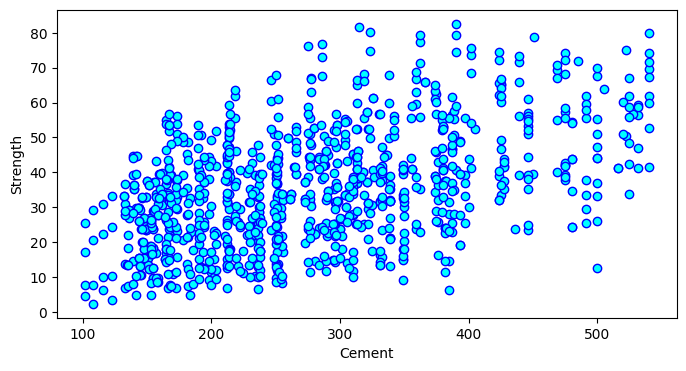

In [14]:
plt.figure(figsize=[8,4])
plt.scatter(y='strength', x='cement', color='cyan',edgecolors='blue', data=df)
plt.ylabel('Strength')
plt.xlabel('Cement')
plt.show()

### Outlier treatment 🚫
○ Boxplot
# (Optional: Removing Outliers based on domain knowledge - skipping unless specified)

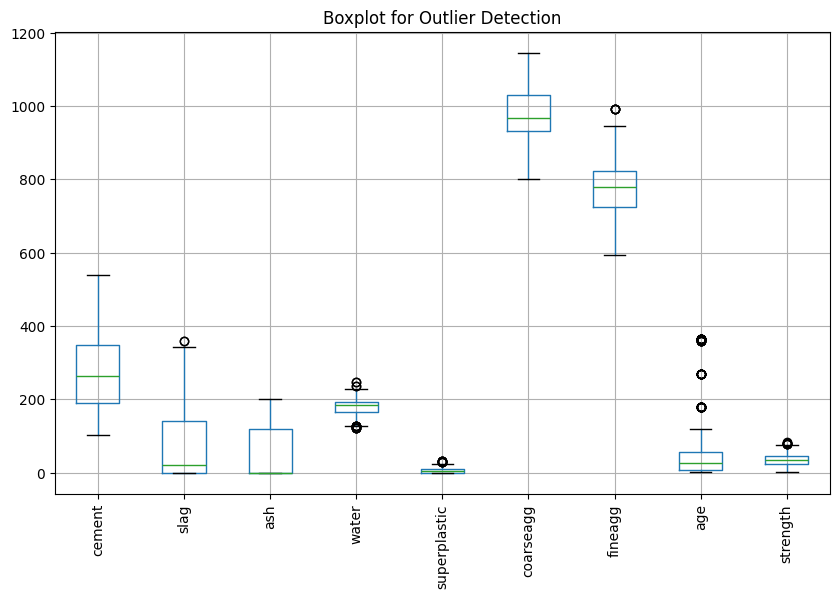

In [15]:
plt.figure(figsize=(10, 6))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28


In [17]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        911 non-null    float64
 1   slag          911 non-null    float64
 2   ash           911 non-null    float64
 3   water         911 non-null    float64
 4   superplastic  911 non-null    float64
 5   coarseagg     911 non-null    float64
 6   fineagg       911 non-null    float64
 7   age           911 non-null    int64  
 8   strength      911 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 71.2 KB


### Check distributions & apply transformations (if needed)
https://stackoverflow.com/questions/45483890/how-to-correctly-use-scipys-skew-and-kurtosis-functions

○ Skewness/Kurtosis

In [18]:
print("\nSkewness:\n", df.skew())
print("\nKurtosis:\n", df.kurt())


Skewness:
 cement          0.598848
slag            0.833207
ash             0.365914
water           0.044768
superplastic    0.300207
coarseagg      -0.138014
fineagg        -0.292571
age             1.274967
strength        0.386698
dtype: float64

Kurtosis:
 cement         -0.365289
slag           -0.537861
ash            -1.460247
water          -0.152313
superplastic   -0.730551
coarseagg      -0.571383
fineagg        -0.042240
age             0.691560
strength       -0.412022
dtype: float64


### Feature engineering ⚙️
No categorical features, so no one-hot encoding needed

### Split data into train/test sets 💻

In [19]:
X = df.drop(['strength'], axis =1).values # Independent variable
y = df['strength'].values # dependent variable

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Evaluation ⚖️

### Linear Regression

In [23]:
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name} Evaluation:")
    print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")
    r2 = metrics.r2_score(y_test, y_pred)
    print(f"R2 Score: {r2:.2f}")
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    print(f"Adjusted R2 Score: {adj_r2:.2f}")
    
    # Visualize actual vs predicted
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.show()

    # Print actual vs predicted difference
    diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
    print(diff.head())


Linear Regression Evaluation:
MAE: 6.32
MSE: 65.83
RMSE: 8.11
R2 Score: 0.74
Adjusted R2 Score: 0.73


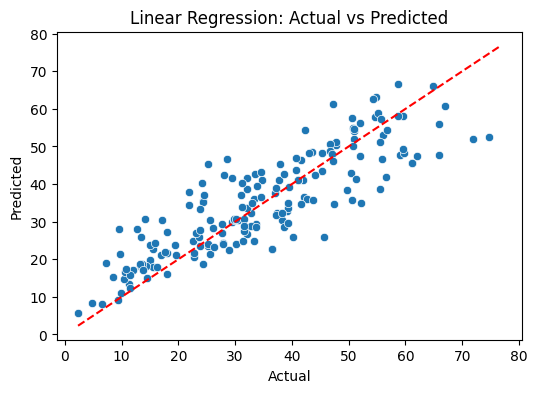

   Actual  Predicted  Difference
0   38.20  30.508214    7.691786
1   22.63  24.807333   -2.177333
2   30.23  24.160274    6.069726
3   54.60  57.720321   -3.120321
4   37.43  32.365359    5.064641
Training R² Score: 76.28
Testing R² Score: 74.11


In [24]:
lr_model = LinearRegression()
evaluate_model(lr_model, "Linear Regression")
print("Training R² Score:", round(lr_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(lr_model.score(X_test_scaled, y_test)*100, 2))

###  Decision Tree


Decision Tree Evaluation:
MAE: 4.47
MSE: 47.31
RMSE: 6.88
R2 Score: 0.81
Adjusted R2 Score: 0.81


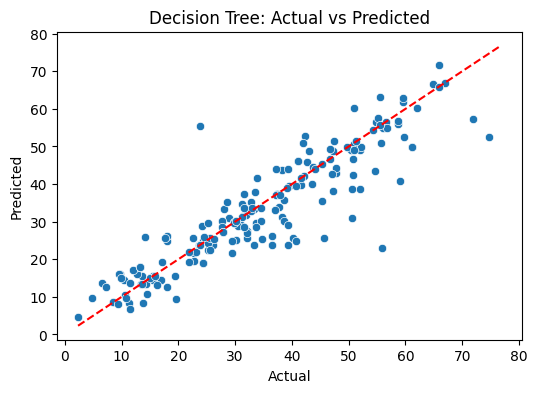

   Actual  Predicted  Difference
0   38.20      31.27        6.93
1   22.63      25.75       -3.12
2   30.23      25.10        5.13
3   54.60      43.38       11.22
4   37.43      37.43        0.00
Training R² Score: 99.9
Testing R² Score: 81.39


In [25]:
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_model, "Decision Tree")
print("Training R² Score:", round(dt_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(dt_model.score(X_test_scaled, y_test)*100, 2))

### Random Forest


Random Forest Evaluation:
MAE: 3.67
MSE: 28.15
RMSE: 5.31
R2 Score: 0.89
Adjusted R2 Score: 0.88


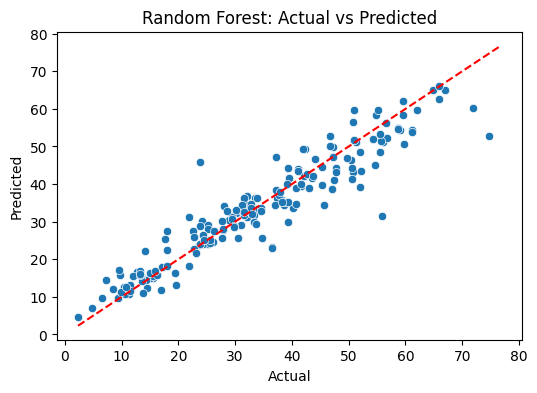

   Actual  Predicted  Difference
0   38.20    35.8372      2.3628
1   22.63    27.5818     -4.9518
2   30.23    32.2286     -1.9986
3   54.60    45.1329      9.4671
4   37.43    36.2383      1.1917
Training R² Score: 98.58
Testing R² Score: 88.93


In [26]:
rf_model = RandomForestRegressor(random_state=42)
evaluate_model(rf_model, "Random Forest")
print("Training R² Score:", round(rf_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(rf_model.score(X_test_scaled, y_test)*100, 2))

### Support Vector Machine


Support Vector Machine Evaluation:
MAE: 6.82
MSE: 77.54
RMSE: 8.81
R2 Score: 0.69
Adjusted R2 Score: 0.68


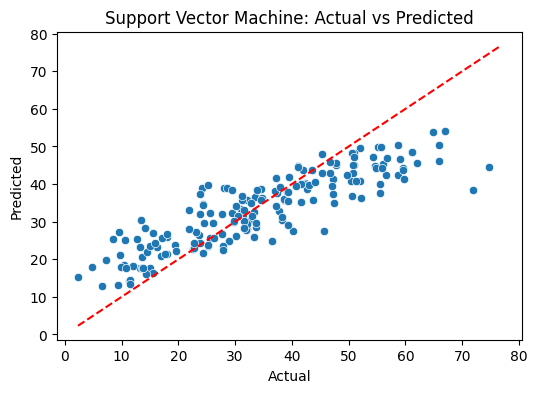

   Actual  Predicted  Difference
0   38.20  30.316159    7.883841
1   22.63  22.650574   -0.020574
2   30.23  26.264340    3.965660
3   54.60  44.739253    9.860747
4   37.43  37.539001   -0.109001
Training R² Score: 72.12
Testing R² Score: 69.5


In [27]:
svm_model = SVR()
evaluate_model(svm_model, "Support Vector Machine")
print("Training R² Score:", round(svm_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(svm_model.score(X_test_scaled, y_test)*100, 2))

### K Nearest Neighbors


K Nearest Neighbors Evaluation:
MAE: 5.98
MSE: 61.85
RMSE: 7.86
R2 Score: 0.76
Adjusted R2 Score: 0.75


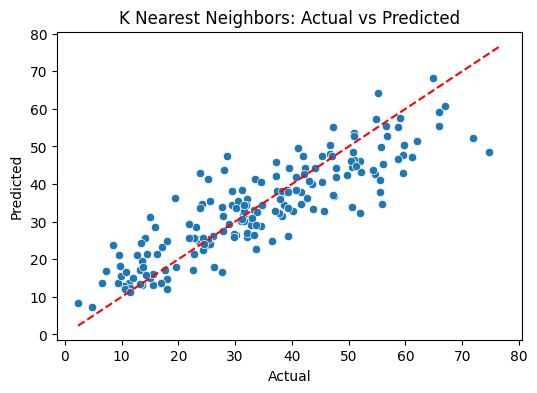

   Actual  Predicted  Difference
0   38.20     31.634       6.566
1   22.63     17.142       5.488
2   30.23     26.388       3.842
3   54.60     42.796      11.804
4   37.43     38.212      -0.782
Training R² Score: 86.24
Testing R² Score: 75.67


In [28]:
knn_model = KNeighborsRegressor()
evaluate_model(knn_model, "K Nearest Neighbors")
print("Training R² Score:", round(knn_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(knn_model.score(X_test_scaled, y_test)*100, 2))

### XGBoost Regressor


XGBoost Regressor Evaluation:
MAE: 3.41
MSE: 26.69
RMSE: 5.17
R2 Score: 0.90
Adjusted R2 Score: 0.89


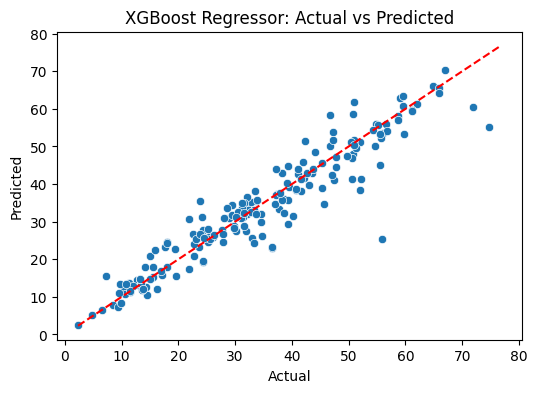

   Actual  Predicted  Difference
0   38.20  43.001595   -4.801595
1   22.63  26.650112   -4.020112
2   30.23  27.642992    2.587008
3   54.60  50.101856    4.498144
4   37.43  37.234211    0.195789
Training R² Score: 99.82
Testing R² Score: 89.5


In [29]:
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
evaluate_model(xgb_model, "XGBoost Regressor")
print("Training R² Score:", round(xgb_model.score(X_train_scaled, y_train)*100, 2))
print("Testing R² Score:", round(xgb_model.score(X_test_scaled, y_test)*100, 2))

### K-Fold Cross Validation

In [30]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Support Vector Machine', SVR()),
    ('K Nearest Neighbors', KNeighborsRegressor()),
    ('XGBoost Regressor', XGBRegressor(random_state=42, objective='reg:squarederror'))
]
print("K-Fold Cross Validation Scores (5 folds):\n")
for name, model in models:
    scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print(f"{name} = Mean R²: {scores.mean():.2f}")

K-Fold Cross Validation Scores (5 folds):

Linear Regression = Mean R²: 0.75
Decision Tree = Mean R²: 0.83
Random Forest = Mean R²: 0.90
Support Vector Machine = Mean R²: 0.20
K Nearest Neighbors = Mean R²: 0.65
XGBoost Regressor = Mean R²: 0.91


### Cross-Validation Results 🔁

In [31]:
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Support Vector Machine': svm_model,
    'K Nearest Neighbors': knn_model,
    'XGBoost Regressor': xgb_model
}

print("\nCross Validation Scores (Mean R²):")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"{name}: {scores.mean():.4f}")


Cross Validation Scores (Mean R²):
Linear Regression: 0.7529
Decision Tree: 0.7887
Random Forest: 0.8894
Support Vector Machine: 0.6676
K Nearest Neighbors: 0.7474
XGBoost Regressor: 0.8976


In [32]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=23, max_depth=10)),
    ('Random Forest', RandomForestRegressor(random_state=23, n_estimators=150)),
    ('SVM', SVR(kernel='rbf')),
    ('KNN', KNeighborsRegressor(n_neighbors=7)),
    ('XGBoost', XGBRegressor(random_state=23, n_estimators=150, learning_rate=0.1))
]

results = []

for name, model in models:
    model.fit(X_train_scaled, y_train)
    train_r2 = model.score(X_train_scaled, y_train) * 100
    test_r2 = model.score(X_test_scaled, y_test) * 100
    results.append([name, round(train_r2, 2), round(test_r2, 2)])

df_results = pd.DataFrame(results, columns=['Model', 'Training R² Score', 'Testing R² Score'])

print(df_results)


               Model  Training R² Score  Testing R² Score
0  Linear Regression              76.28             74.11
1      Decision Tree              97.68             80.72
2      Random Forest              98.65             87.76
3                SVM              72.12             69.50
4                KNN              82.51             73.02
5            XGBoost              99.52             89.60


### Conclusion 🏁

XGBoost is the best-performing model in terms of both Training R² Score (99.52) and Testing R² Score (89.60).XGBoost consistently performs well with a very high training R² and a strong testing R², indicating it is not overfitting and generalizes well to unseen data.

Random Forest also performs quite well with Training R² Score of 98.65 and Testing R² Score of 87.76, making it another solid choice.

However, XGBoost slightly outperforms Random Forest on the test set, making it the top model for predicting concrete strength in this case.

### Concrete Strength Prediction: Model Evaluation 🏗️

Libraries 📚: Essential libraries for data manipulation, visualization, and modeling are imported.

Loading Data 📂: The dataset is loaded and checked for correctness.

Cleaning Data 🧹: Missing values and duplicates are removed to ensure data quality.

Data Exploration 🔍: Basic statistics and visualizations (histograms, scatter plots, correlation heatmap) are used to understand the data and detect patterns.

Outlier Removal 🛠️: Outliers are filtered using the IQR method to improve model performance.

Feature Engineering 🔧: A cement-to-water ratio feature is added to improve predictions.

Data Splitting 📦: The data is split into training and testing sets for model evaluation.

Feature Scaling 🧮: Features are scaled to ensure comparability, especially for models like SVM.

Model Evaluation ⚙️: Various models (Linear Regression, Decision Tree, Random Forest, SVM, KNN, XGBoost) are trained and evaluated using metrics like MAE, MSE, RMSE, and R².

Cross-Validation 🔁: Cross-validation ensures reliable model performance.

Feature Importance 🌳: Random Forest identifies the most important features for predicting concrete strength.

Conclusion 🎉: The best model is selected based on the highest R² score and is used for predictions.

### 🖊️ Author